In [207]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [208]:
# Load and read in csv file
csv_path = "../GRAD_RATE_AND_OUTCOMES_2019.csv"
grad_rates_df = pd.read_csv(csv_path)
grad_rates_df.head()

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,report_school_year,aggregation_index,aggregation_type,aggregation_code,aggregation_name,entity_inactive_date,lea_beds,lea_name,nrc_code,nrc_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,0,Statewide,0,All Districts and Charters,NaN,NaN,NaN,NaN,NaN,...,68331,33%,2756,1%,5417,3%,1374,1%,18866,9%
1,2018-19,0,Statewide,0,All Districts and Charters,NaN,NaN,NaN,NaN,NaN,...,36981,37%,909,1%,2006,2%,541,1%,7442,7%
2,2018-19,0,Statewide,0,All Districts and Charters,NaN,NaN,NaN,NaN,NaN,...,31350,29%,1847,2%,3411,3%,833,1%,11424,11%
3,2018-19,0,Statewide,0,All Districts and Charters,NaN,NaN,NaN,NaN,NaN,...,228,18%,26,2%,49,4%,17,1%,209,17%
4,2018-19,0,Statewide,0,All Districts and Charters,NaN,NaN,NaN,NaN,NaN,...,4329,12%,633,2%,1567,4%,342,1%,4851,13%


In [209]:
# Drop any unneccessary columns to get reduced DataFrame
reduced_grad_rates = grad_rates_df[["county_name", "enroll_cnt", "grad_cnt", "grad_pct", 
                                    "still_enr_cnt", "still_enr_pct", "dropout_cnt", "dropout_pct"]]

reduced_grad_rates

,county_name,enroll_cnt,grad_cnt,grad_pct,still_enr_cnt,still_enr_pct,dropout_cnt,dropout_pct
0,NaN,206486,177940,86%,5417,3%,18866,9%
1,NaN,100118,89170,89%,2006,2%,7442,7%
2,NaN,106368,88770,83%,3411,3%,11424,11%
3,NaN,1255,952,76%,49,4%,209,17%
4,NaN,37080,29662,80%,1567,4%,4851,13%
...,...,...,...,...,...,...,...,...
224133,YATES,-,-,-,-,-,-,-
224134,YATES,-,-,-,-,-,-,-
224135,YATES,-,-,-,-,-,-,-
224136,YATES,-,-,-,-,-,-,-


In [210]:
# Get data for NYC boroughs 
# (Bronx = BRONX, Brooklyn = KINGS, Manhattan = NEW YORK, Queens = QUEENS, Staten Island = RICHMOND)
nyc_grad_rates = reduced_grad_rates.query('county_name == "BRONX" | county_name == "KINGS" | county_name =="NEW YORK"  | county_name == "QUEENS" | county_name == "RICHMOND"')
nyc_grad_rates

,county_name,enroll_cnt,grad_cnt,grad_pct,still_enr_cnt,still_enr_pct,dropout_cnt,dropout_pct
4704,NEW YORK,16392,13275,81%,776,5%,2018,12%
4705,NEW YORK,8735,7433,85%,303,3%,871,10%
4706,NEW YORK,7657,5842,76%,473,6%,1147,15%
4707,NEW YORK,101,66,65%,7,7%,23,23%
4708,NEW YORK,4248,3364,79%,230,5%,539,13%
...,...,...,...,...,...,...,...,...
183699,RICHMOND,-,-,-,-,-,-,-
183700,RICHMOND,-,-,-,-,-,-,-
183701,RICHMOND,-,-,-,-,-,-,-
183702,RICHMOND,-,-,-,-,-,-,-


In [211]:
# Set all null data (fields with hyphens) to NaN
nyc_grad_rates = nyc_grad_rates.replace('-',np.NaN)
nyc_grad_rates

,county_name,enroll_cnt,grad_cnt,grad_pct,still_enr_cnt,still_enr_pct,dropout_cnt,dropout_pct
4704,NEW YORK,16392,13275,81%,776,5%,2018,12%
4705,NEW YORK,8735,7433,85%,303,3%,871,10%
4706,NEW YORK,7657,5842,76%,473,6%,1147,15%
4707,NEW YORK,101,66,65%,7,7%,23,23%
4708,NEW YORK,4248,3364,79%,230,5%,539,13%
...,...,...,...,...,...,...,...,...
183699,RICHMOND,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183700,RICHMOND,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183701,RICHMOND,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183702,RICHMOND,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [212]:
# Drop null data
nyc_grad_rates = nyc_grad_rates.dropna(how="any")
nyc_grad_rates

,county_name,enroll_cnt,grad_cnt,grad_pct,still_enr_cnt,still_enr_pct,dropout_cnt,dropout_pct
4704,NEW YORK,16392,13275,81%,776,5%,2018,12%
4705,NEW YORK,8735,7433,85%,303,3%,871,10%
4706,NEW YORK,7657,5842,76%,473,6%,1147,15%
4707,NEW YORK,101,66,65%,7,7%,23,23%
4708,NEW YORK,4248,3364,79%,230,5%,539,13%
...,...,...,...,...,...,...,...,...
183692,RICHMOND,29,22,76%,1,3%,6,21%
183694,RICHMOND,36,25,69%,5,14%,5,14%
183695,RICHMOND,22,16,73%,3,14%,3,14%
183697,RICHMOND,24,14,58%,6,25%,3,13%


In [213]:
# Converting percentage columns to floats

nyc_grad_rates["grad_pct"] = nyc_grad_rates["grad_pct"].replace(
    '%', '', regex=True).astype('float')/100
nyc_grad_rates["still_enr_pct"] = nyc_grad_rates["still_enr_pct"].replace(
    '%', '', regex=True).astype('float')/100
nyc_grad_rates["dropout_pct"] = nyc_grad_rates["dropout_pct"].replace(
    '%', '', regex=True).astype('float')/100

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [214]:
# Convert enrollment count and grad count to floats
nyc_grad_rates["enroll_cnt"] = nyc_grad_rates["enroll_cnt"].astype('float')
nyc_grad_rates["grad_cnt"] = nyc_grad_rates["grad_cnt"].astype('float')

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [215]:
# Resetting the index
nyc_grad_rates = nyc_grad_rates.reset_index(drop=True)
nyc_grad_rates

,county_name,enroll_cnt,grad_cnt,grad_pct,still_enr_cnt,still_enr_pct,dropout_cnt,dropout_pct
0,NEW YORK,16392.0,13275.0,0.81,776,0.05,2018,0.12
1,NEW YORK,8735.0,7433.0,0.85,303,0.03,871,0.10
2,NEW YORK,7657.0,5842.0,0.76,473,0.06,1147,0.15
3,NEW YORK,101.0,66.0,0.65,7,0.07,23,0.23
4,NEW YORK,4248.0,3364.0,0.79,230,0.05,539,0.13
...,...,...,...,...,...,...,...,...
40273,RICHMOND,29.0,22.0,0.76,1,0.03,6,0.21
40274,RICHMOND,36.0,25.0,0.69,5,0.14,5,0.14
40275,RICHMOND,22.0,16.0,0.73,3,0.14,3,0.14
40276,RICHMOND,24.0,14.0,0.58,6,0.25,3,0.13


In [216]:
# Exporting DataFrame as CSV file
nyc_grad_rates.to_csv("nyc_grad_rates.csv")

In [217]:
# Average grad rate per county
nyc_grad_rates.groupby(["county_name"])["grad_pct"].mean()

county_name
BRONX       0.719870
KINGS       0.757800
NEW YORK    0.786880
QUEENS      0.805884
RICHMOND    0.794940
Name: grad_pct, dtype: float64

In [218]:
# Sum of enrollment count by county
nyc_grad_rates.groupby(["county_name"])["enroll_cnt"].sum()

county_name
BRONX       1749920.0
KINGS       2587976.0
NEW YORK    1919060.0
QUEENS      2405378.0
RICHMOND     564238.0
Name: enroll_cnt, dtype: float64

In [219]:
# Sum of graduation count by county
nyc_grad_rates.groupby(["county_name"])["grad_cnt"].sum()

county_name
BRONX       1280598.0
KINGS       2070061.0
NEW YORK    1529914.0
QUEENS      1978962.0
RICHMOND     473821.0
Name: grad_cnt, dtype: float64

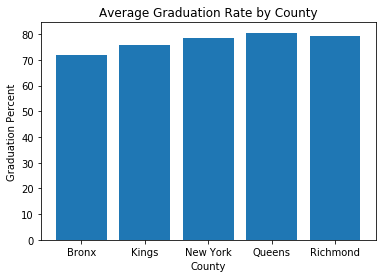

In [229]:
counties = ["Bronx", "Kings", "New York", "Queens", "Richmond"]
avg_grad_rate = nyc_grad_rates.groupby(["county_name"])["grad_pct"].mean()*100

plt.bar(counties, avg_grad_rate)
plt.title("Average Graduation Rate by County")
plt.xlabel("County")
plt.ylabel("Graduation Percent")
plt.show()

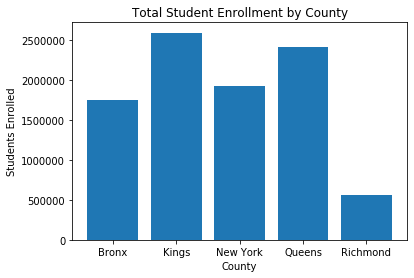

In [230]:
counties = ["Bronx", "Kings", "New York", "Queens", "Richmond"]
total_enroll = nyc_grad_rates.groupby(["county_name"])["enroll_cnt"].sum()

plt.bar(counties, total_enroll)
plt.title("Total Student Enrollment by County")
plt.xlabel("County")
plt.ylabel("Students Enrolled")
plt.show()

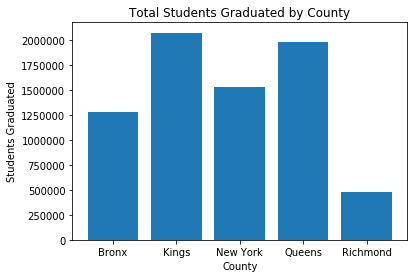

In [231]:
counties = ["Bronx", "Kings", "New York", "Queens", "Richmond"]
total_enroll = nyc_grad_rates.groupby(["county_name"])["grad_cnt"].sum()

plt.bar(counties, total_enroll)
plt.title("Total Students Graduated by County")
plt.xlabel("County")
plt.ylabel("Students Graduated")
plt.show()